<a href="https://colab.research.google.com/github/fatmatosunytu/5/blob/main/K_en_yak%C4%B1n_kom%C5%9Fu_algoritmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [11]:
# Veri kümesini yükle
covid = pd.read_csv("qt_dataset.csv", encoding='latin1')  # or 'iso-8859-1'

In [12]:
# Veri kümesi hakkında bilgi edin
covid.head()

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98.0,65.0,95.0,Negative
1,1,96.0,92.0,95.0,Negative
2,2,95.0,92.0,99.0,Negative
3,3,97.0,56.0,96.0,Negative
4,4,88.0,94.0,98.0,Positive


In [13]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10001 non-null  object 
 1   Oxygen       10000 non-null  float64
 2   PulseRate    10000 non-null  float64
 3   Temperature  10000 non-null  float64
 4   Result       10000 non-null  object 
dtypes: float64(3), object(2)
memory usage: 390.8+ KB


In [14]:
covid.describe()

,Oxygen,PulseRate,Temperature
count,10000.000000,10000.000000,10000.000000
mean,92.548900,84.976600,100.000700
std,4.611197,26.305841,3.185045
min,85.000000,40.000000,95.000000
25%,88.000000,63.000000,97.000000
50%,93.000000,85.000000,100.000000
75%,97.000000,108.000000,103.000000
max,100.000000,130.000000,105.000000


In [15]:
# Veri kümesinde sağlıklı ve hasta olan kayıtların yüzdelik olarak listelenmesi
round(covid['Result'].value_counts() * 100 / len(covid), 2)

,count
Result,
Negative,50.09
Positive,49.89


In [16]:
# Veri Ön-İşleme
X = covid[['Oxygen', 'PulseRate', 'Temperature']].values  # Bağımsız değişkenler
y = covid['Result'].values  # Bağımlı değişken (Hastalık sonucu)

In [17]:
# Veriyi eğitim ve test setlerine ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# K-En Yakın Komşu (KNN) algoritmasını içe aktar
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# K değerlerini belirlemek için bir dizi oluştur
neighbors = np.arange(1, 9)

In [21]:
# Eğitim ve test doğruluğunu saklamak için dizileri ayarlama
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))




In [23]:
# Farklı K değerleri için KNN modelini eğitme ve doğruluk hesaplama
for i, k in enumerate(neighbors):
    # K komşuları ile bir KNN sınıflandırıcısı oluştur
    knn = KNeighborsClassifier(n_neighbors=k)



In [27]:
# K-En Yakın Komşu Sınıflandırıcı Kütüphanesini Ekleme
from sklearn.neighbors import KNeighborsClassifier

# Eğitim ve test doğruluğunu saklamak için dizileri ayarlama
neighbors = np.arange(1, 9)  # K değerlerini belirleme
train_accuracy = np.empty(len(neighbors))  # Eğitim doğruluğu için boş dizi
test_accuracy = np.empty(len(neighbors))  # Test doğruluğu için boş dizi




In [29]:
# Farklı k değerleri için modeli eğit ve değerlendir
for i, k in enumerate(neighbors):
    # K komşuları ile bir k-NN sınıflandırıcısı kur
    knn = KNeighborsClassifier(n_neighbors=k)



In [31]:
print(covid.isnull().sum())  # Her sütunda kaç tane NaN olduğunu gösterir


ID             1
Oxygen         2
PulseRate      2
Temperature    2
Result         2
dtype: int64


In [33]:
covid.dropna(inplace=True)  # Tüm satırları eksik veri içerenleri kaldırır


In [35]:
covid = pd.read_csv("qt_dataset.csv", encoding="latin1")  # Alternatif olarak: encoding="iso-8859-1"


In [37]:
import chardet

with open("qt_dataset.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)  # Tahmini kodlamayı ekrana yazdır

covid = pd.read_csv("qt_dataset.csv", encoding=result["encoding"])


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [39]:
covid.dropna(inplace=True)  # Tüm eksik verileri içeren satırları kaldırır


In [40]:
X = covid[['Oxygen', 'PulseRate', 'Temperature']].values
y = covid['Result'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  # Hata olmaması gerekiyor


KNeighborsClassifier()

In [41]:
    # Modele uydurma
    knn.fit(X_train, y_train)

    # Eğitim doğruluğunu hesapla
    train_accuracy[i] = knn.score(X_train, y_train)

    # Test doğruluğunu hesapla
    test_accuracy[i] = knn.score(X_test, y_test)

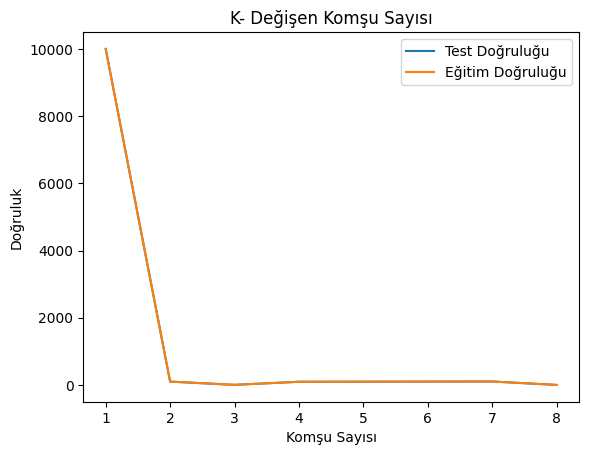

In [42]:
# Grafiğin oluşturulması
plt.title('K- Değişen Komşu Sayısı')
plt.plot(neighbors, test_accuracy, label='Test Doğruluğu')
plt.plot(neighbors, train_accuracy, label='Eğitim Doğruluğu')
plt.legend()
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')
plt.show()


In [43]:
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: [1.00000000e+04 1.00000700e+02 3.18504536e+00 9.50000000e+01
 9.70000000e+01 1.00000000e+02 1.03000000e+02 9.91142857e-01]
Test Accuracy: [1.00000000e+04 1.00000700e+02 3.18504536e+00 9.50000000e+01
 9.70000000e+01 1.00000000e+02 1.03000000e+02 9.77333333e-01]


In [44]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Doğruluk hesaplamaları
    train_accuracy[i] = knn.score(X_train, y_train)  # Eğitim doğruluğu
    test_accuracy[i] = knn.score(X_test, y_test)  # Test doğruluğu


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
neighbors = np.arange(1, 9)


In [47]:
print("Neighbors:", neighbors)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Neighbors: [1 2 3 4 5 6 7 8]
Train Accuracy: [1.         0.99271429 0.994      0.99057143 0.99114286 0.991
 0.99071429 0.98728571]
Test Accuracy: [0.984      0.98333333 0.98066667 0.98266667 0.97733333 0.98033333
 0.981      0.98033333]


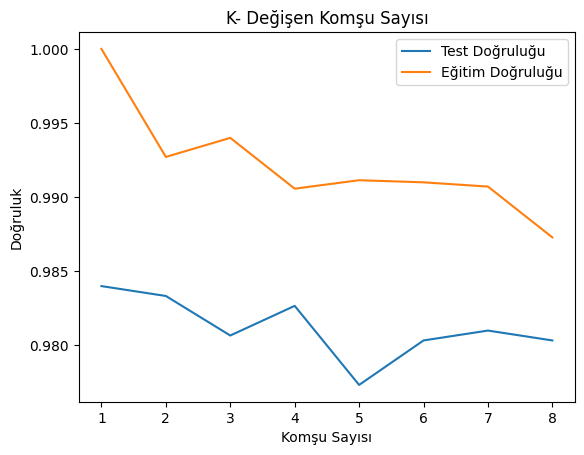

In [48]:
# Grafiğin oluşturulması
plt.title('K- Değişen Komşu Sayısı')
plt.plot(neighbors, test_accuracy, label='Test Doğruluğu')
plt.plot(neighbors, train_accuracy, label='Eğitim Doğruluğu')
plt.legend()
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')
plt.show()


In [49]:
# K komşuları ile bir KNN sınıflandırıcısı kurulması
knn = KNeighborsClassifier(n_neighbors=7)

# Modelin uygulanması
knn.fit(X_train, y_train)

# Modelin doğruluk skoru hesaplanıyor
knn.score(X_test, y_test)

# Test verisi için tahmin yapılıyor
y_pred = knn.predict(X_test)



In [50]:
# Sınıflandırma performans metriklerini hesapla ve yazdır
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))       # Modelin doğruluk oranı
print(confusion_matrix(y_test, y_pred))     # Karışıklık matrisi
print(classification_report(y_test, y_pred)) # Ayrıntılı sınıflandırma raporu


0.992
[[1484   16]
 [   8 1492]]
              precision    recall  f1-score   support

    Negative       0.99      0.99      0.99      1500
    Positive       0.99      0.99      0.99      1500

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [51]:
from sklearn.metrics import accuracy_score

# Test verisi üzerinde tahmin yap
y_pred = knn.predict(X_test)

# Doğruluk skorunu hesapla
accuracy = accuracy_score(y_test, y_pred)

# Sonucu yazdır
print(f"Model Doğruluk Oranı: {accuracy:.4f}")


Model Doğruluk Oranı: 0.9920


In [52]:
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Eğitim Doğruluk Oranı: {train_accuracy:.4f}")


Eğitim Doğruluk Oranı: 0.9941
